In [63]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

input_df = pd.read_csv(r'../datasets/input_df.csv')
# print(input_df)


In [41]:
print(input_df)

   Rutting (mm)  Fatigue_Cracking (m²)  Block_Cracking (m²)  \
0           4.8                    2.0                  0.0   

   Longitudinal_Cracking (m²)  Transverse_Cracking (m²)  Patching (m²)  \
0                        26.0                       0.0          118.0   

   Potholes (Number)  Delamination (m²)  Severity_Rating  \
0                  5               18.0                0   

   Traffic_Volume (vehicles/day)  Temperature_C  Precipitation_mm  \
0                           8600           10.5             120.0   

   Maintenance_History  
0                    0  


In [40]:

label_encoder = LabelEncoder()
label_encoder.fit(["Low", "Medium", "High"])
input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
label_encoder2 = LabelEncoder()
label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])


In [42]:
scaler = MinMaxScaler()
numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                   'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                   'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                   'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

rmax = orignaldb.max()
rmin = orignaldb.min()

range_data = pd.DataFrame([rmax, rmin])

# print(range_data[numeric_columns])
scaler.fit(range_data[numeric_columns])

# print(scaler.transform(input_df[numeric_columns]))
input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])



In [43]:
model = CatBoostRegressor()
model.load_model(r"../models/trialmodels/best_catboost.cbm")

result = model.predict(input_df)


print(result)

[0.52624878]


In [ ]:
df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])
scaler2 = MinMaxScaler()
max = y.max()
min = y.min()
scaler2.fit([[min], [max]])

final = scaler2.inverse_transform([result])
# final = scaler.inverse_transform(result)
print(final)

[[30.83970624]]


[0] RESULT RAW   : [0.52624878]
[0] RESULT FINAL : [30.83970624]
[0] ACTUAL       : [20.0]
[0] DIFFERENCE   : [[10.83970624]]
---------------------------------------
[1] RESULT RAW   : [0.52624878]
[1] RESULT FINAL : [30.83970624]
[1] ACTUAL       : [12.0]
[1] DIFFERENCE   : [[18.83970624]]
---------------------------------------
[2] RESULT RAW   : [0.82720942]
[2] RESULT FINAL : [41.61409706]
[2] ACTUAL       : [41.4]
[2] DIFFERENCE   : [[0.21409706]]
---------------------------------------
[3] RESULT RAW   : [0.82720942]
[3] RESULT FINAL : [41.61409706]
[3] ACTUAL       : [36.2]
[3] DIFFERENCE   : [[5.41409706]]
---------------------------------------
[4] RESULT RAW   : [0.81793758]
[4] RESULT FINAL : [41.2821655]
[4] ACTUAL       : [45.0]
[4] DIFFERENCE   : [[-3.7178345]]
---------------------------------------
[5] RESULT RAW   : [0.80114092]
[5] RESULT FINAL : [40.68084486]
[5] ACTUAL       : [40.0]
[5] DIFFERENCE   : [[0.68084486]]
---------------------------------------
[6] RESUL

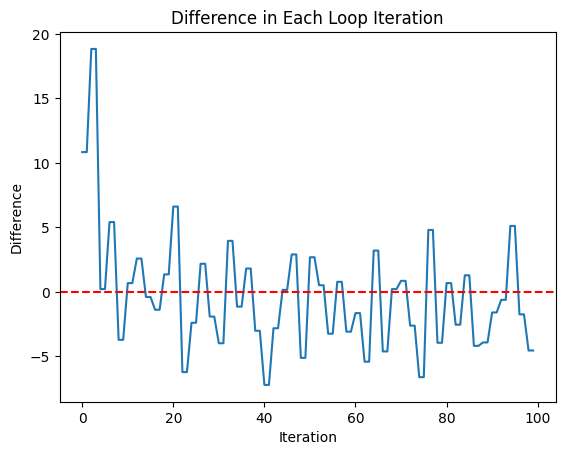

CPU times: total: 219 ms
Wall time: 1.04 s


In [ ]:
%%time
df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])

# print(df)

differences = []

for i in range(0,50):
    selectx = df.iloc[[i]].copy()
    # print(first_row_df)
    selecty = y.iloc[[i]].copy()
    # print(first_row_y)
    input_df = selectx
    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])
    scaler = MinMaxScaler()
    numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                    'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                    'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                    'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

    orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
    orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

    rmax = orignaldb.max()
    rmin = orignaldb.min()

    range_data = pd.DataFrame([rmax, rmin])

    # print(range_data[numeric_columns])
    scaler.fit(range_data[numeric_columns])

    # print(scaler.transform(input_df[numeric_columns]))
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])    
    model = CatBoostRegressor()
    model.load_model(r"../models/trialmodels/best_catboost.cbm")

    result = model.predict(input_df)

    scaler2 = MinMaxScaler()
    max = y.max()
    min = y.min()
    scaler2.fit([[min], [max]])

    final = scaler2.inverse_transform([result])
    # final = scaler.inverse_transform(result)
    difference = final[0] - selecty.values[0]
    differences.append(difference)
    print(f'[{i}] RESULT RAW   : {result}')
    print(f'[{i}] RESULT FINAL : {final[0]}')
    print(f'[{i}] ACTUAL       : [{selecty.values[0]}]')
    print(f'[{i}] DIFFERENCE   : [{difference}]')
    print('---------------------------------------')
    difference = final[0] - selecty.values[0]
    differences.append(difference)

plt.plot(differences)
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Difference in Each Loop Iteration')
plt.axhline(0, color='r', linestyle='--')
plt.show()



In [52]:
print(selecty.values[0])

20.0
